In [1]:
from data_engineering import *
from porfolio_and_backtesting import *

In [2]:
end = dt(2022, 10, 4)
start = dt(2015, 10, 18)

In [3]:
df = getData(start, end, [], True)
tickers = ["AAPL"]*len(df.columns)

Data was loaded sucessfully!


In [4]:
w = np.array([[1 / (len(df.columns))]*len(df.columns),])

In [5]:
w = w.reshape(-1)

In [6]:
sp500 = Portfolio("S&P500 EW",df,tickers, w, start, end)

In [7]:
sp500.sharpe_ratio_ann

0.6908116538325497

In [8]:
pr = {"APL": [0,1,2,3,3], "HH": [0,1,2,3,4]}
pd.DataFrame(pr, index = ["R","l","F","L","5"])

,APL,HH
R,0,0
l,1,1
F,2,2
L,3,3
5,3,4


In [9]:
sp500.total_return

1.2584156121030219

In [10]:
sp500.performance_report()

The performance metrics for the portfolio S&P500 EW are:

                       S&P500 EW
Total Return            1.258416
Expected Return         0.000543
Daily Volatility        0.012484
Annualized Returns      0.136903
Annualized Volatility   0.198178
Sharpe Ratio            0.690812


In [11]:
import seaborn as sb

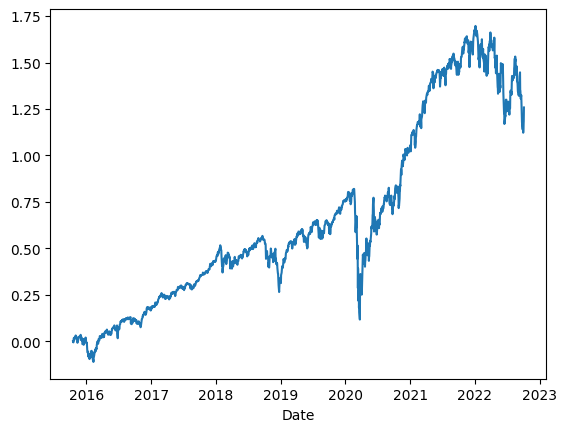

In [12]:
sp500.performance_plot()